In [1]:
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import warnings as w
w.filterwarnings('ignore') 

# 📂 Data Loading and Initial Exploration

# Dataset True.csv

In [2]:
df_true=pd.read_csv('True.csv')

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [5]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
df_true.shape

(21417, 4)

In [7]:
df_true=df_true.fillna(" ")

In [8]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
df_true['title'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script'

In [10]:
df_true['text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [11]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [12]:
df_true['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [13]:
df_true["Class"] =1

In [14]:
df_true

,title,text,subject,date,Class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


# Dataset Fake.csv


In [15]:
df_fake=pd.read_csv('Fake.csv')

In [16]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [17]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [18]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [19]:
df_fake.shape

(23481, 4)

In [20]:
df_fake = df_fake.fillna(" ")

In [21]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [22]:
df_fake['title'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [23]:
df_fake['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [24]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [25]:
df_fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [26]:
df_fake["Class"] =0

In [27]:
df_fake

,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


# merging both datasets

In [28]:
df = pd.concat([df_true,df_fake],axis=0) 

In [29]:
df

,title,text,subject,date,Class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


# Randomising our dataset

In [30]:
shuffled_data = df.sample(frac=1,random_state=None).reset_index(drop=True)
shuffled_data

,title,text,subject,date,Class
0,Oscar Winning Actress JENNIFER LAWRENCE Recall...,These leftist actors are so darn funny. You kn...,politics,"May 15, 2016",0
1,[VIDEO] DETROIT WOMAN KILLS BEST FRIEND OVER 2...,If the murderer was arguing in defense of a Re...,left-news,"Jun 16, 2015",0
2,France's conservatives choose leader to rattle...,PARIS (Reuters) - In his first seven months in...,worldnews,"December 10, 2017",1
3,"Fiercest clashes yet in Sanaa, Yemen casualtie...",GENEVA (Reuters) - Fighting in Yemen s capital...,worldnews,"December 4, 2017",1
4,“This Is TOTALLY FAKE!” Tucker Loses His Tempe...,Tucker Carlson debates the Russia conspiracy w...,politics,"May 11, 2017",0
...,...,...,...,...,...
44893,MEGYN KELLY PRAISES Woman Who Flipped Off Trum...,NBC host Megyn Kelly must be really desperate ...,left-news,"Nov 9, 2017",0
44894,(VIDEO) BALTIMORE MAYOR REOPENS LOOTED MALL: T...,,left-news,"May 4, 2015",0
44895,China calls for understanding of Myanmar's nee...,BEIJING (Reuters) - Violent incidents in Myanm...,worldnews,"September 20, 2017",1
44896,LORETTA LYNCH Makes Disturbing VIDEO Encouragi...,Obama s former AG Loretta Lynch released a vid...,politics,"Mar 4, 2017",0


In [31]:
shuffled_data.to_csv("manual_dataset.csv")

# 📝 Data Preprocessing

In [32]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [33]:
df = pd.read_csv("manual_dataset.csv")
df

,Unnamed: 0,title,text,subject,date,Class
0,0,Oscar Winning Actress JENNIFER LAWRENCE Recall...,These leftist actors are so darn funny. You kn...,politics,"May 15, 2016",0
1,1,[VIDEO] DETROIT WOMAN KILLS BEST FRIEND OVER 2...,If the murderer was arguing in defense of a Re...,left-news,"Jun 16, 2015",0
2,2,France's conservatives choose leader to rattle...,PARIS (Reuters) - In his first seven months in...,worldnews,"December 10, 2017",1
3,3,"Fiercest clashes yet in Sanaa, Yemen casualtie...",GENEVA (Reuters) - Fighting in Yemen s capital...,worldnews,"December 4, 2017",1
4,4,“This Is TOTALLY FAKE!” Tucker Loses His Tempe...,Tucker Carlson debates the Russia conspiracy w...,politics,"May 11, 2017",0
...,...,...,...,...,...,...
44893,44893,MEGYN KELLY PRAISES Woman Who Flipped Off Trum...,NBC host Megyn Kelly must be really desperate ...,left-news,"Nov 9, 2017",0
44894,44894,(VIDEO) BALTIMORE MAYOR REOPENS LOOTED MALL: T...,,left-news,"May 4, 2015",0
44895,44895,China calls for understanding of Myanmar's nee...,BEIJING (Reuters) - Violent incidents in Myanm...,worldnews,"September 20, 2017",1
44896,44896,LORETTA LYNCH Makes Disturbing VIDEO Encouragi...,Obama s former AG Loretta Lynch released a vid...,politics,"Mar 4, 2017",0


In [34]:
df['news']=df['title']+" "+df['text']

In [35]:
df['news']

0        Oscar Winning Actress JENNIFER LAWRENCE Recall...
1        [VIDEO] DETROIT WOMAN KILLS BEST FRIEND OVER 2...
2        France's conservatives choose leader to rattle...
3        Fiercest clashes yet in Sanaa, Yemen casualtie...
4        “This Is TOTALLY FAKE!” Tucker Loses His Tempe...
                               ...                        
44893    MEGYN KELLY PRAISES Woman Who Flipped Off Trum...
44894    (VIDEO) BALTIMORE MAYOR REOPENS LOOTED MALL: T...
44895    China calls for understanding of Myanmar's nee...
44896    LORETTA LYNCH Makes Disturbing VIDEO Encouragi...
44897    Warren Buffett, Larry Fink criticize Trump tax...
Name: news, Length: 44898, dtype: object

In [36]:
df.head(3)

,Unnamed: 0,title,text,subject,date,Class,news
0,0,Oscar Winning Actress JENNIFER LAWRENCE Recall...,These leftist actors are so darn funny. You kn...,politics,"May 15, 2016",0,Oscar Winning Actress JENNIFER LAWRENCE Recall...
1,1,[VIDEO] DETROIT WOMAN KILLS BEST FRIEND OVER 2...,If the murderer was arguing in defense of a Re...,left-news,"Jun 16, 2015",0,[VIDEO] DETROIT WOMAN KILLS BEST FRIEND OVER 2...
2,2,France's conservatives choose leader to rattle...,PARIS (Reuters) - In his first seven months in...,worldnews,"December 10, 2017",1,France's conservatives choose leader to rattle...


In [37]:
df.drop(['title','text','date','subject','Unnamed: 0'],axis=1,inplace=True)

In [38]:
# df = df.drop('Unnamed: 0', axis=1)
len(df['news'][0])

2282

In [39]:
# Data Preprocessing and cleaning

In [40]:
st=stopwords.words('english')
def removing_stopwords(x):
    m=[]
    t=x.split(' ')
    for i in t:
        if i not in st:
            m.append(i.lower())
    return " ".join(m)        
            

In [41]:
df['news']=df['news'].apply(removing_stopwords)

In [42]:
df.head(2)

,Class,news
0,0,oscar winning actress jennifer lawrence recall...
1,0,[video] detroit woman kills best friend over 2...


In [43]:
len(df['news'][0])

1686

In [44]:
import re as r
df['news']=df['news'].apply(lambda x: r.sub('[^a-zA-Z0-9]',' ',x))

In [45]:
df['news']=df['news'].apply(lambda x: x.replace("   "," "))

In [46]:
len(df['news'][0])

1664

In [47]:
pt=PorterStemmer()
def stemm(x):
    t=[]
    m=x.split(' ')
    for i in m:
        t.append(pt.stem(i))
    return " ".join(t)    

In [48]:
df['news']=df['news'].apply(stemm)

In [49]:
len(df['news'][0])

1483

In [50]:
df.head(3)

,Class,news
0,0,oscar win actress jennif lawrenc recal attend ...
1,0,video detroit woman kill best friend over 20...
2,1,franc s conserv choos leader rattl macron s pe...


<Axes: xlabel='Class', ylabel='Count'>

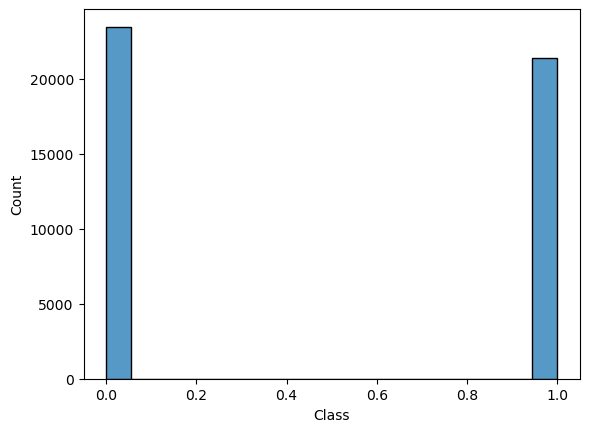

In [51]:
import seaborn as sn
sn.histplot(df['Class'])

In [52]:
filter_df=df[df['Class']==1]
all_text = ' '.join(filter_df['news'].astype(str).tolist())

In [53]:
# 🌟 Visualizing Word Clouds

In [54]:
from wordcloud import WordCloud
words = [word for word in all_text.split()]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

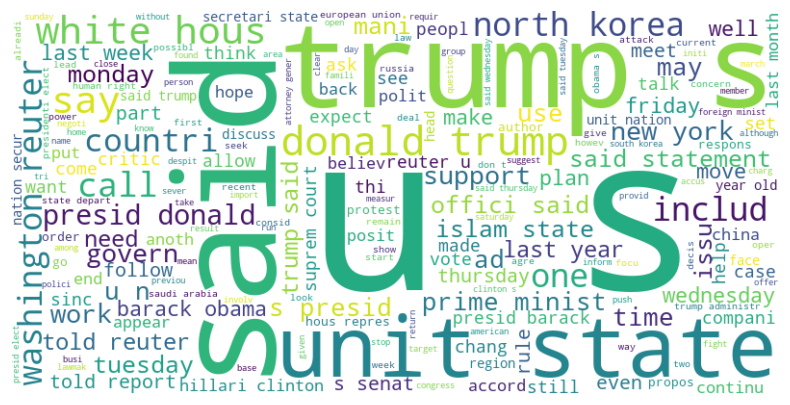

In [55]:
import matplotlib.pyplot as mp
mp.figure(figsize=(10, 5))
mp.imshow(wordcloud, interpolation='bilinear')
mp.axis('off')
mp.show()

In [56]:
filter_df=df[df['Class']==0]
all_text = ' '.join(filter_df['news'].astype(str).tolist())

In [57]:
words = [word for word in all_text.split()]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))



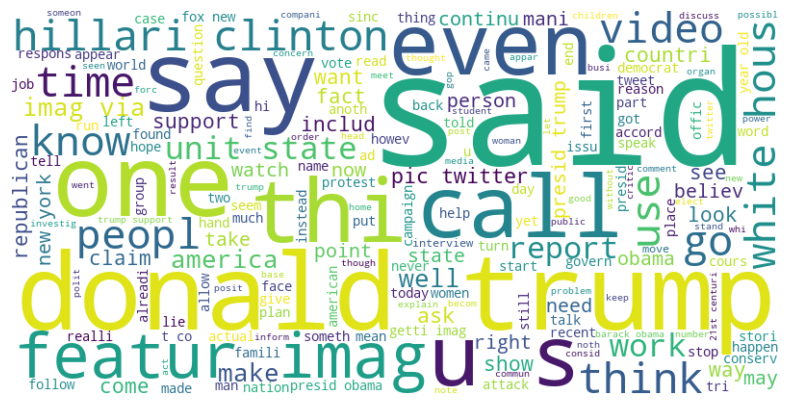

In [58]:
mp.figure(figsize=(10, 5))
mp.imshow(wordcloud, interpolation='bilinear')
mp.axis('off')
mp.show()

# 📝 Data Preprocessing and Splitting 📊

In [59]:
x=df['news'].values
y=df['Class'].values

In [60]:
x

array(['oscar win actress jennif lawrenc recal attend same concert as trump i adam find make video go hey trump  f ck you   video  these leftist actor darn funni  you know funni  they never mention 4 american hillari left die benghazi  they never mention put nation nation secur nation risk person unsecur email server  you know els funni  that never mention person support  vagina  d  name  crimin investig adult life  but let hear funni nit wit actress support gener public  not democrat  want track trump make video attempt humili him  i actual sorri never found him  would amaz career end move  the 25 year old oscar win actress join fellow actor johnni depp jame mcavoy graham norton show friday night  reveal attend concert republican presidenti frontrunn also present  i concert i heard attend  i full secur  i like find donald trump lawrenc told norton becaus i adam find make video go hey trump  f ck you  i rest found actress continu audienc enthusiast applaus he knew i look him  watch mea

In [61]:
y

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vector =TfidfVectorizer()
x=word_vector.fit_transform(x)

In [64]:
x

<44898x95968 sparse matrix of type '<class 'numpy.float64'>'
	with 7555496 stored elements in Compressed Sparse Row format>

In [65]:
print(x)

  (0, 60523)	0.024597332491473167
  (0, 17498)	0.04769485706234421
  (0, 90109)	0.024592844361405533
  (0, 76404)	0.02718167648312503
  (0, 31466)	0.06016090669422935
  (0, 91538)	0.02563164373403441
  (0, 40557)	0.046021505829826614
  (0, 48237)	0.03851103925917123
  (0, 80681)	0.03577612244548106
  (0, 88498)	0.047125713126029596
  (0, 29870)	0.023127881020206263
  (0, 42223)	0.027994842872869335
  (0, 50382)	0.044456193996805456
  (0, 10599)	0.056269672135319034
  (0, 68370)	0.06743868004132497
  (0, 74645)	0.027483901378931905
  (0, 91750)	0.024411348672184908
  (0, 29205)	0.033408140057547685
  (0, 36430)	0.06328310472709439
  (0, 84719)	0.05455946942415306
  (0, 10044)	0.07931846265319206
  (0, 33002)	0.05190325976333198
  (0, 50416)	0.03850426747558519
  (0, 68307)	0.06255290551443873
  (0, 11576)	0.030933681832387625
  :	:
  (44897, 91538)	0.028944241211688516
  (44897, 80681)	0.060599667061495846
  (44897, 29870)	0.013058447868390307
  (44897, 50382)	0.012550412448661775
  (44

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
x_train.shape

(35918, 95968)

In [70]:
y_train.shape

(35918,)

In [71]:
x_test.shape

(8980, 95968)

In [72]:
y_test.shape

(8980,)

# 🔍 Model Training and Evaluation 🚀¶

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [77]:
y_pred = model.predict(x_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print("The test Accuracy of logistic regresssion :", accuracy)

The test Accuracy of logistic regresssion : 0.9908685968819599


In [80]:
y_pred=model.predict(x_train)
print("The train accuracy",accuracy_score(y_train,y_pred))

The train accuracy 0.9936522078066707


In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model.predict(x_test)
# Assuming you have a trained model and predictions

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9892397660818714
Recall: 0.9915592028135991
F1-Score: 0.9903981264637002


In [86]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [88]:
print("\nClassification Report : ")
print(classification_report(y_test,y_pred))


Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.99      0.99      0.99      4265

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [90]:
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test,y_pred))


Confusion Matrix : 
[[4669   46]
 [  36 4229]]


[[0.9902439 0.0097561]
 [0.0084408 0.9915592]]


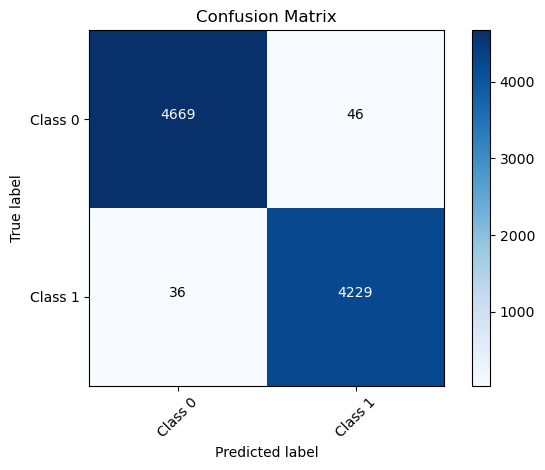

In [98]:
import matplotlib.pyplot as plt
import itertools

cm = confusion_matrix(y_test, y_pred)

# Create the plot
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Add labels and ticks
class_names = ['Class 0', 'Class 1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix   
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

#  Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [100]:
y_pred = model.predict(x_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("The test Accuracy of Decision Tree Classifier :", accuracy)

The test Accuracy of logistic regresssion : 0.9957683741648107


In [102]:
y_pred=model.predict(x_train)
print("The train accuracy",accuracy_score(y_train,y_pred))

The train accuracy 1.0


In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model.predict(x_test)
# Assuming you have a trained model and predictions

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9960103262145036
Recall: 0.9950762016412661
F1-Score: 0.9955430448041286


In [104]:
print("\nClassification Report : ")
print(classification_report(y_test,y_pred))


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4715
           1       1.00      1.00      1.00      4265

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



[[0.99639449 0.00360551]
 [0.0049238  0.9950762 ]]


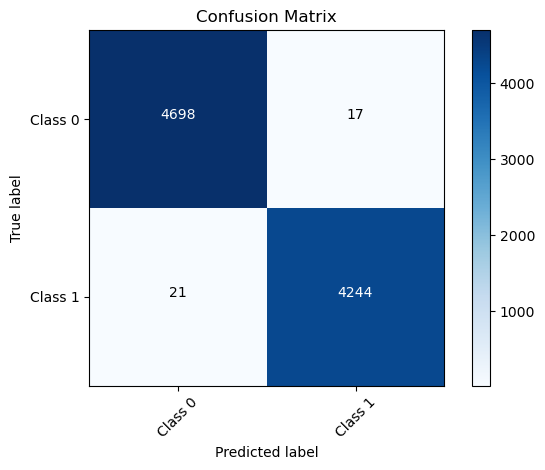

In [106]:
cm = confusion_matrix(y_test, y_pred)

# Create the plot
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Add labels and ticks
class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix   
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

#  Gradient Boost Classifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [112]:
y_pred = model.predict(x_test)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print("The test Accuracy of Gradient Boost Classifier :", accuracy)

The test Accuracy of Gradient Boost Classifier : 0.9951002227171493


In [114]:
y_pred=model.predict(x_train)
print("The train accuracy",accuracy_score(y_train,y_pred))

The train accuracy 0.9968817862909961


In [115]:
y_pred = model.predict(x_test)
# Assuming you have a trained model and predictions

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9911566208983011
Recall: 0.9985932004689332
F1-Score: 0.9948610137818267


In [116]:
print("\nClassification Report : ")
print(classification_report(y_test,y_pred))


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4715
           1       0.99      1.00      0.99      4265

    accuracy                           1.00      8980
   macro avg       0.99      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



[[0.99194062 0.00805938]
 [0.0014068  0.9985932 ]]


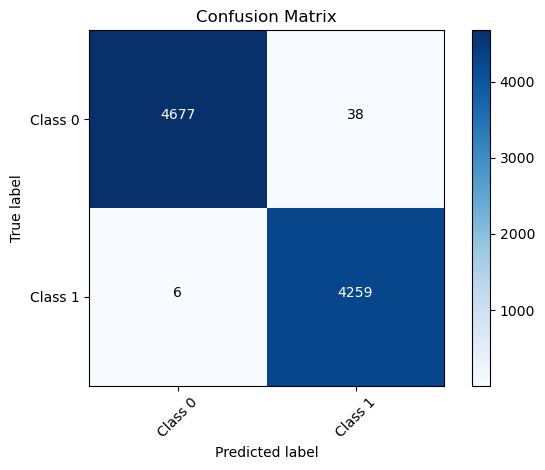

In [117]:
cm = confusion_matrix(y_test, y_pred)

# Create the plot
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Add labels and ticks
class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix   
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

#  Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
y_pred = model.predict(x_test)

In [120]:
accuracy = accuracy_score(y_test, y_pred)
print("The test Accuracy of Random Forest Classifier :", accuracy)

The test Accuracy of Random Forest Classifier : 0.9948775055679288


In [124]:
y_pred=model.predict(x_train)
print("The train accuracy",accuracy_score(y_train,y_pred))

The train accuracy 1.0


In [121]:
y_pred = model.predict(x_test)
# Assuming you have a trained model and predictions

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9964697575900212
Recall: 0.9927315357561547
F1-Score: 0.9945971341320179


In [122]:
print("\nClassification Report : ")
print(classification_report(y_test,y_pred))


Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4715
           1       1.00      0.99      0.99      4265

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



[[0.99681866 0.00318134]
 [0.00726846 0.99273154]]


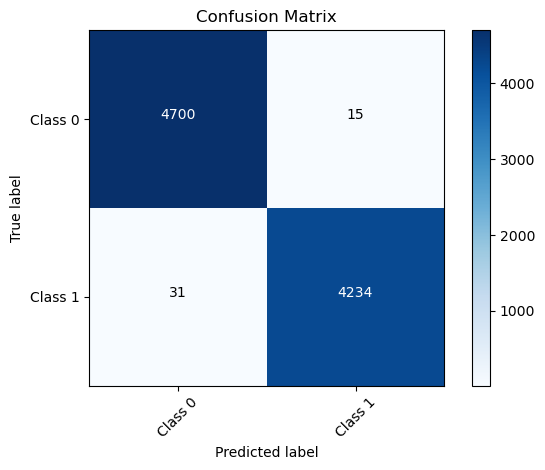

In [123]:
cm = confusion_matrix(y_test, y_pred)

# Create the plot
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Add labels and ticks
class_names = ['Class 0', 'Class 1']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix   
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()